<h1>Predicción con modelo Decision Trees</h1>

In [30]:
%pip install ipywidgets
%pip install ipython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
%pip install -U scikit-learn


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import seaborn as sns

In [33]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

from sklearn.model_selection import cross_val_score

In [34]:
dataframe = pd.read_csv("../data/clean_dataset_terror_movies.csv")
dataframe

,Unnamed: 0.1,Unnamed: 0,id,poster_path,adult,overview,release_date,genre_ids,original_title,original_language,...,Acción,Comedia,Historia,Western,Suspense,Crimen,Ciencia ficción,Misterio,Documental,reciente
0,0,9,1011679,/v5CfpzxoJDkZxjZAizClFdlEF0U.jpg,False,"Hace décadas, la URSS desarrolló tiburones imp...",2022-08-12,28-878-53-27,Shark Side of the Moon,en,...,1,0,0,0,1,0,1,0,0,1
1,1,10,884184,/yQTRmPzKAdLodknnPVtImm6FWPZ.jpg,False,Después del presunto suicidio de su hermano sa...,2023-02-10,27-53,Consecration,en,...,0,0,0,0,1,0,0,0,0,0
2,2,11,988165,/5KmscR49WkmuPJKjmK4OUmsRn5C.jpg,False,Decidido a demostrar la posibilidad de dimensi...,2022-06-29,27,H.P. Lovecraft's Witch House,en,...,0,0,0,0,0,0,0,0,0,1
3,3,12,829410,/nBgxSimgLMGYCQckRQw7C2f7row.jpg,False,"Durante la pandemia, Parker y su mejor amigo d...",2022-09-24,27-53,Sick,en,...,0,0,0,0,1,0,0,0,0,1
4,4,13,676547,/hbtJK32km46jTmlvBXgR8SunfAp.jpg,False,"Una joven monja, la hermana Ann (Jacqueline By...",2022-10-28,27-53,Prey for the Devil,en,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,6508,9994,636900,/sPlGqCLrXcVzTNeO6IFkm2gwr3T.jpg,False,NaN,2019-10-30,27,A Halloween Trick,en,...,0,0,0,0,0,0,0,0,0,4
6509,6509,9995,628959,/cAhJi03mtZAEq0IC6yK2BdirHBB.jpg,False,NaN,2019-10-05,27,Lady Belladonna's Tales From The Inferno,en,...,0,0,0,0,0,0,0,0,0,4
6510,6510,9996,627132,/cZW9GfXBb4cWj53cpnfTsqqclH3.jpg,False,NaN,2012-10-30,27-53,Fade Into You,en,...,0,0,0,0,1,0,0,0,0,11
6511,6511,9997,623670,/fk4eaKL5ilNY4x2PFrievUW7obf.jpg,False,NaN,2018-06-25,27-878,Hippopotamus,en,...,0,0,0,0,0,0,1,0,0,5


In [35]:
terror_comedia = dataframe[dataframe["is_terror_comedia"] == 1][["val_count",  "popularity", "vote_count",   'vote_average', 'budget', 'duration', 'revenues',  'quantile',  "reciente"]]

In [36]:
terror_comedia.iloc[1,:].to_list()

[1068.0, 451.66, 29.0, 6.6, 0.0, 90.0, 0.0, 1.0, 0.0]

In [37]:
dataframe.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'poster_path', 'adult', 'overview',
       'release_date', 'genre_ids', 'original_title', 'original_language',
       'title', 'backdrop_path', 'popularity', 'vote_count', 'video',
       'vote_average', 'media_type', 'budget', 'duration', 'revenues',
       'spoken_languagess', 'genre_list', 'is_terror_comedia', 'val_count',
       'quantile', 'count_labels', 'Música', 'Romance', 'Familia', 'Bélica',
       'Película de TV', 'Aventura', 'Fantasía', 'Animación', 'Drama',
       'Terror', 'Acción', 'Comedia', 'Historia', 'Western', 'Suspense',
       'Crimen', 'Ciencia ficción', 'Misterio', 'Documental', 'reciente'],
      dtype='object')

In [38]:
#dataframe = dataframe[["id", "genre_list", "popularity"]]
#dataframe


In [39]:
X = np.array(dataframe[["val_count",  "popularity", "vote_count",   'vote_average', 'budget', 'duration', 'revenues',  'quantile',  "reciente"]])
Y = np.array(dataframe['is_terror_comedia'])
X.shape

(6513, 9)

In [40]:
X = dataframe[["val_count",  "popularity", "vote_count",   'vote_average', 'budget', 'duration', 'revenues',  'quantile',  "reciente"]]
Y = dataframe['is_terror_comedia']
X.shape

(6513, 9)

In [41]:
seed=42

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

Bagging

In [43]:
test = X_train.iloc[1,:]

In [44]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)
dtc = DecisionTreeClassifier()

model = BaggingClassifier(estimator=dtc,
                n_estimators = 100,
                random_state = 42)

bagging = model
results_bagg =  model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean()

results_bagg

0.9012155438456532

In [45]:
model.fit(X,Y)
predictions = model.predict(X_test)
predictions

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [46]:
predict_probab = model.predict_proba(X)
np.round(predict_probab, 2)

array([[0.08, 0.92],
       [0.  , 1.  ],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [47]:
results_bagg =  model_selection.cross_val_score(model, X, Y, cv=10).mean()

results_bagg

0.8652420061632411

In [48]:
skfold = model_selection.StratifiedKFold(n_splits=10)

results_bagg =  model_selection.cross_val_score(model, X, Y, cv=skfold).mean()

results_bagg

0.8652420061632411

In [49]:
model_selection.cross_val_score(model, X, Y, cv=10)

array([0.7101227 , 0.75      , 0.81441718, 0.86789555, 0.87864823,
       0.94623656, 0.92933948, 0.92780338, 0.92780338, 0.90015361])

## 4. Random Forest

In [50]:
model = RandomForestClassifier(n_estimators = 100,
                max_features = 3,
                random_state = 42)

results_rf = model_selection.cross_val_score(model, X_train, y_train, cv=10).mean()
randomforest = model
results_rf

0.8732512123947682

## 5. Adaboost

In [51]:
model = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=2),
            n_estimators = 30,
            random_state = 42)

adaboost = model

results_ada = model_selection.cross_val_score(model, X_train, y_train, cv=10).mean()
results_ada

0.9000692797010474

## GradientBoosting

In [52]:
model = GradientBoostingClassifier(n_estimators=100,
random_state=seed)

results_gb = model_selection.cross_val_score(model, X_train, y_train, cv=10).mean()
results_gb

0.9069437154913611

## XGBoost

In [53]:
model = XGBClassifier(n_estimators=100,  eval_metric = 'logloss')

results_xgb = model_selection.cross_val_score(model, X_train, y_train, cv=10).mean()

results_xgb

0.9085528940020573

In [54]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [55]:
feature_scores = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

feature_scores

val_count       0.639669
vote_count      0.065408
duration        0.053690
vote_average    0.051911
revenues        0.049978
budget          0.049112
popularity      0.047821
reciente        0.042411
quantile        0.000000
dtype: float32

## Resultados

In [56]:
resultados = [results_bagg, results_rf, results_ada, results_gb, results_xgb]
algoritmos = ["Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

result = pd.Series(resultados, algoritmos).sort_values(ascending=False)
result

XGBoost             0.908553
GradientBoosting    0.906944
Ada Boost           0.900069
Random Forest       0.873251
Bagging DT          0.865242
dtype: float64

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

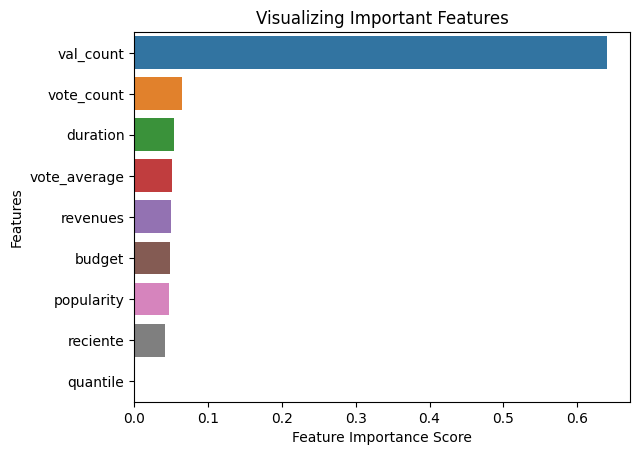

In [58]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [59]:
X_train.iloc[1,:].to_list()

[2571.0, 5.612, 80.0, 4.3, 0.0, 70.0, 0.0, 3.0, 22.0]

In [60]:
X_train.dtypes

val_count         int64
popularity      float64
vote_count        int64
vote_average    float64
budget            int64
duration          int64
revenues          int64
quantile          int64
reciente          int64
dtype: object

In [61]:
model = XGBClassifier(n_estimators=100,  eval_metric = 'logloss')

model.fit(X_train,y_train)
#X_nueva = np.array([[2571, 5.612, 80, 4.3, 0, 70, 0, 3, 22]])
X_nueva = np.array([[1068, 451.66, 29, 6.6, 0, 90, 0, 1, 0]])
model.predict(X_nueva)


array([1])

Aplicar el modelo XGBClassifier con las features seleccionadas

In [62]:
X = dataframe[["val_count",  "popularity", "vote_count",   'vote_average', 'budget', 'duration', 'revenues']]
Y = dataframe['is_terror_comedia']
X.shape

(6513, 7)

In [63]:
seed=42

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [66]:
model = XGBClassifier(n_estimators=100,  eval_metric = 'logloss')

model.fit(X_train,y_train)
#X_nueva = np.array([[2571, 5.612, 80, 4.3, 0, 70, 0]])
X_nueva = np.array([[1068, 451.66, 29, 6.6, 0, 90, 0]])
model.predict(X_nueva)

array([1])

In [68]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1223,  102],
       [  86,  739]], dtype=int64)

In [82]:
plt.style.use('dark_background')

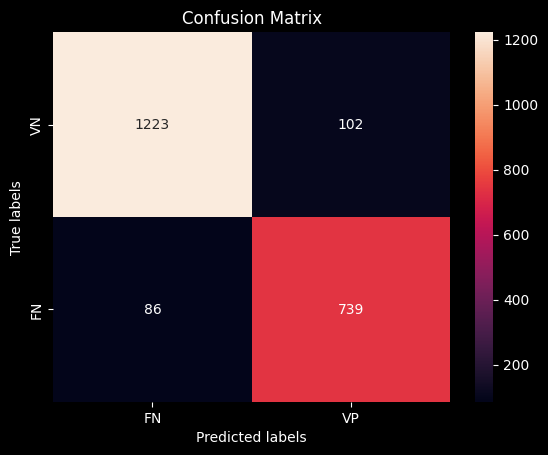

In [83]:
ax= plt.subplot()
sns.heatmap(cm,fmt='g', annot=True)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FN', 'VP']); ax.yaxis.set_ticklabels(['VN', 'FN']);

In [ ]:
from sklearn.metrics import accuracy_score
# fit the model to the training set

model.fit(X_train, y_train)


# Predict on the test set results

y_pred = model.predict(X_test)

# Check accuracy score 

print('Resultado del modelo sin dos columnas : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9126


In [84]:
X_train

,val_count,popularity,vote_count,vote_average,budget,duration,revenues
1068,378,12.173,128,3.6,0,84,0
1942,2571,5.612,80,4.3,0,70,0
1647,67,6.510,54,5.7,0,88,0
2598,65,6.308,34,4.9,0,88,0
1700,2571,8.604,121,5.4,0,89,0
...,...,...,...,...,...,...,...
3772,65,3.758,27,5.3,0,60,0
5191,1068,2.487,6,6.0,0,107,0
5226,2571,1.670,4,7.3,0,19,0
5390,110,1.620,3,2.7,0,90,0


In [87]:
X_train.columns

Index(['val_count', 'popularity', 'vote_count', 'vote_average', 'budget',
       'duration', 'revenues'],
      dtype='object')

In [90]:
test_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'poster_path', 'adult', 'overview',
       'release_date', 'genre_ids', 'original_title', 'original_language',
       'title', 'backdrop_path', 'popularity', 'vote_count', 'video',
       'vote_average', 'media_type', 'budget', 'duration', 'revenues',
       'spoken_languagess', 'genre_list', 'is_terror_comedia', 'val_count',
       'quantile'],
      dtype='object')

In [92]:
test_data = pd.read_csv("../data/valor_target.csv")
test_data = test_data[['val_count', 'popularity', 'vote_count', 'vote_average', 'budget',
       'duration', 'revenues']]

In [98]:
probs = model.predict_proba(X_test)[:, 1]

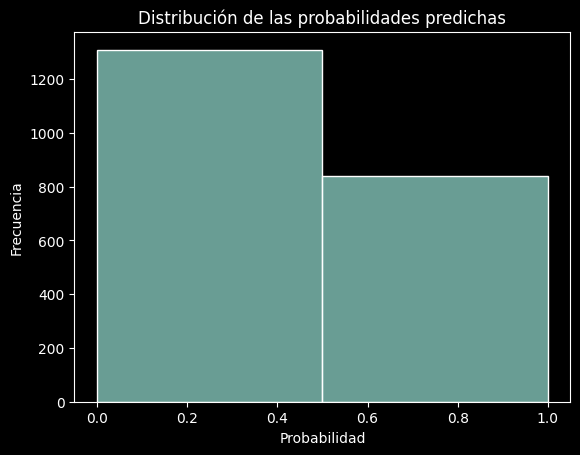

In [109]:
sns.histplot(probs, bins=2, kde=False)
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de las probabilidades predichas')
plt.show()


In [95]:
#probabilidad de que con los parámetros de Braindead la película sea de terror-comedia

X_nueva = np.array(test_data)
prediction = model.predict_proba(X_nueva)

In [114]:
prediction[0]

array([9.9970329e-01, 2.9669164e-04], dtype=float32)

<AxesSubplot: >

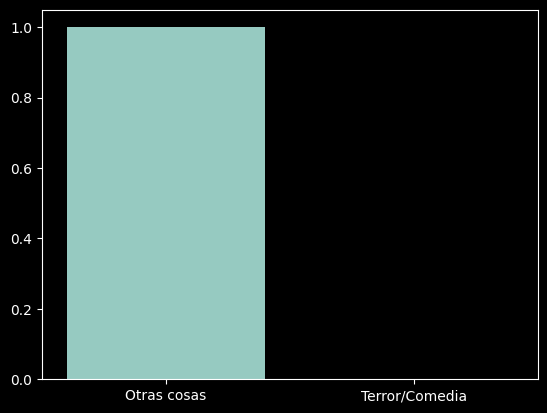

In [116]:
sns.barplot(x =["Otras cosas", "Terror/Comedia"], y = [0.99970329, 0.00029669164])
